#### Importes

In [ ]:
!pip install sklearn_lvq
!pip3 install memory_profiler
!pip3 install optuna
!pip install sklvq
!pip install yellowbrick
!pip install imblearn

In [ ]:
import numpy
import numpy as np
import pandas as pd
import sklvq
from sklvq import GLVQ
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import time
import os
import sys
import requests
from sklearn import datasets
from sklearn.utils import Bunch
from memory_profiler import memory_usage
import optuna
from sklearn.metrics import accuracy_score
from sklearn import metrics

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
# Importando as bibliotecas necessárias
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# modelos
# knn
from sklearn.neighbors import KNeighborsClassifier
import matplotlib as mpl

# Máquinas de vetor de suporte
from sklearn import svm
from sklearn.svm import SVC
from sklearn import datasets

# para gerar os gráficos da árvore de decisão
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz, plot_tree
try:
    from StringIO import StringIO ## para Python 2
except ImportError:
    from io import StringIO ## para Python 3
from IPython.display import Image
import pydotplus

# RNA
plt.style.use('seaborn-talk')
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RepeatedKFold


# metricas e plots

from numpy.ma.extras import average
from sklearn.metrics import f1_score
from sklearn.model_selection import RepeatedKFold

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
import seaborn as sns
import seaborn as sn

# 1 - Análise Exploratória dos Dados
Realizou-se a importação dos dados e analisou-se inicialmente, verificando a distribuição, as classes existentes, frequência de ocorrência, correlação, e informações quantidade, para entender o conjunto de dados.

In [ ]:
# importando a base de dados - Interaçãoes dos Estudantes
!wget "https://github.com/AluisioPereira/artigo_ensemble/blob/main/padrao_interacao_ef_em.csv" -O "DADOS.csv" -

In [ ]:
db = pd.read_csv("DADOS.csv",  sep=",", encoding = "ISO-8859-1", low_memory=False)


In [ ]:
db.head()

,id-aluno,id-turma,serie,ensino,login-count,ano-cadastro-usuario,dias-ultimo-login,var01,var02,var03,var04,var05,var06,var07,var08,var09,var10,var11,cluster,padrao
0,441,30,7-ano-ef,fundamental,240,2019,215,0.10350,0.08503,0.00000,1.00000,1.00000,0.02439,0.0,0.00000,0.21416,0.16129,TARDE,Cluster 1,mais interagem
1,731,30,7-ano-ef,fundamental,182,2020,205,0.74045,0.75416,0.70588,0.39259,0.38930,0.03659,1.0,0.52459,1.00000,1.00000,NOITE,Cluster 1,mais interagem
2,1514,30,7-ano-ef,fundamental,469,2020,215,0.10828,0.08133,0.35294,0.56889,0.57058,0.00000,1.0,0.31148,0.67185,0.23502,TARDE,Cluster 1,mais interagem
3,1720,30,7-ano-ef,fundamental,600,2020,215,0.45701,0.43623,0.23529,0.95407,0.95691,0.00000,0.0,0.13115,0.20725,0.26728,NOITE,Cluster 1,mais interagem
4,1872,32,8-ano-ef,fundamental,290,2020,214,0.14650,0.14787,0.82353,0.96593,0.92125,0.39024,0.5,0.01639,0.36269,0.22120,TARDE,Cluster 1,mais interagem


In [ ]:
df = pd.DataFrame(db)
df.head()

data = df.drop(['id-aluno', 'id-turma', 'serie', 'ensino', 'login-count', 'ano-cadastro-usuario', 'dias-ultimo-login', 'cluster'], axis=1, inplace=False)
data.head()

,var01,var02,var03,var04,var05,var06,var07,var08,var09,var10,var11,padrao
0,0.10350,0.08503,0.00000,1.00000,1.00000,0.02439,0.0,0.00000,0.21416,0.16129,TARDE,mais interagem
1,0.74045,0.75416,0.70588,0.39259,0.38930,0.03659,1.0,0.52459,1.00000,1.00000,NOITE,mais interagem
2,0.10828,0.08133,0.35294,0.56889,0.57058,0.00000,1.0,0.31148,0.67185,0.23502,TARDE,mais interagem
3,0.45701,0.43623,0.23529,0.95407,0.95691,0.00000,0.0,0.13115,0.20725,0.26728,NOITE,mais interagem
4,0.14650,0.14787,0.82353,0.96593,0.92125,0.39024,0.5,0.01639,0.36269,0.22120,TARDE,mais interagem


In [ ]:
# separando os atributos em categóricos e contínuos
continuous = data.describe().columns
categorical = data.drop(list(continuous), axis=1).columns
print(continuous)
print(categorical)

Index(['var01', 'var02', 'var03', 'var04', 'var05', 'var06', 'var07', 'var08',
       'var09', 'var10'],
      dtype='object')
Index(['var11', 'padrao'], dtype='object')


In [ ]:
'''
Adotou-se uma abordagem de regressão linear para verificar e completar dados faltantes.
Em que, variáveis ausentes serão preenchidas por valores previstos a partir do modelo (a partir dos valores mais fortemente correlacionados)
'''
import matplotlib.pyplot as plt
%matplotlib inline

continuous_columns_missing_values = []
for column in continuous:
  if data[column].isnull().sum() > 0:
    continuous_columns_missing_values.append(column)
print(continuous_columns_missing_values)

most_correlated_columns = {}
candidates = [
  x for x in continuous if x not in continuous_columns_missing_values
]
for column in continuous_columns_missing_values:
  most_correlated_columns[column] = max(
      candidates, key=lambda x: abs(data[x].corr(data[column]))
  )

[]


In [ ]:
'''
Dados categóricos - para adequar os dados a algoritmos de Machine Learning se fez necessário converter variáveis qualitativas em quantitativas para permitir operações numéricas.
Sendo assim, as variáveis categóricas da base de dados foram convertidas em inteiros através do LabelEncoder da biblioteca sklear.
'''
categorical_columns_missing_values = [
  p[0] for p in dict(data[categorical].isna().sum() > 0).items() if p[1]
]
complete_data = data.dropna()
print(categorical_columns_missing_values)

['var11']


In [ ]:
# Convertendo dados categóricos para números inteiros usando o LabelEncoder da biblioteca Sklearn
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

label_dict = defaultdict(LabelEncoder)
complete_data = complete_data.apply(
    lambda x: label_dict[x.name].fit_transform(x)
    if x.name in list(categorical)
    else x
)

In [ ]:
#reconstruindo sem os dados categoricos
labels = data['padrao']
data.drop('padrao', axis=1, inplace=True)
X = data.apply(
    lambda x: label_dict[x.name].fit_transform(x)
    if x.name in categorical
    else x
)
print(X)

       var01    var02    var03    var04    var05    var06    var07    var08  \
0    0.10350  0.08503  0.00000  1.00000  1.00000  0.02439  0.00000  0.00000   
1    0.74045  0.75416  0.70588  0.39259  0.38930  0.03659  1.00000  0.52459   
2    0.10828  0.08133  0.35294  0.56889  0.57058  0.00000  1.00000  0.31148   
3    0.45701  0.43623  0.23529  0.95407  0.95691  0.00000  0.00000  0.13115   
4    0.14650  0.14787  0.82353  0.96593  0.92125  0.39024  0.50000  0.01639   
..       ...      ...      ...      ...      ...      ...      ...      ...   
958  0.02521  0.02500  0.00000  0.00000  0.00000  0.00000  0.33333  0.00000   
959  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000   
960  0.05042  0.02500  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000   
961  0.02521  0.00000  0.00000  0.00000  0.00000  0.00000  0.66667  0.00000   
962  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.33333  0.00000   

       var09    var10  var11  
0    0.21416  0.1612

In [ ]:
# Codificando os rótulos
Y = label_dict['padrao'].fit_transform(labels)
target_names=['M. I.', 'I. E.', 'I. R.']
print(Y)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

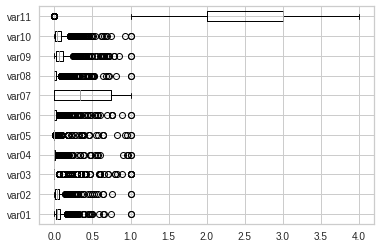

In [ ]:
X.boxplot(vert=False)
plt.show()

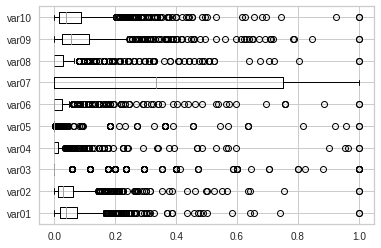

In [ ]:
data.boxplot(vert=False)
plt.show()

In [ ]:
data.corr()

,var01,var02,var03,var04,var05,var06,var07,var08,var09,var10
var01,1.000000,0.954440,0.287068,0.355801,0.290793,0.227760,0.212127,0.197192,0.337565,0.349165
var02,0.954440,1.000000,0.293483,0.295409,0.294451,0.166107,0.161177,0.173373,0.293803,0.307480
var03,0.287068,0.293483,1.000000,0.287465,0.542434,0.111301,-0.015020,0.129519,0.269748,0.247528
var04,0.355801,0.295409,0.287465,1.000000,0.580321,0.539868,0.077465,0.134370,0.291930,0.287440
var05,0.290793,0.294451,0.542434,0.580321,1.000000,0.054659,0.031969,0.058393,0.237315,0.199733
var06,0.227760,0.166107,0.111301,0.539868,0.054659,1.000000,0.050228,0.172743,0.255017,0.203035
var07,0.212127,0.161177,-0.015020,0.077465,0.031969,0.050228,1.000000,-0.005486,0.149294,0.071632
var08,0.197192,0.173373,0.129519,0.134370,0.058393,0.172743,-0.005486,1.000000,0.425633,0.607279
var09,0.337565,0.293803,0.269748,0.291930,0.237315,0.255017,0.149294,0.425633,1.000000,0.821103
var10,0.349165,0.307480,0.247528,0.287440,0.199733,0.203035,0.071632,0.607279,0.821103,1.000000


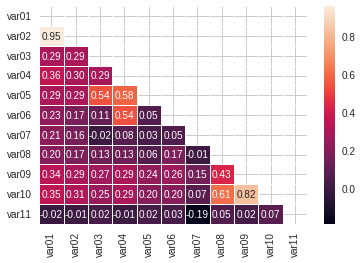

In [ ]:
correlacao = X.corr() #var01 a var11
plot = sn.heatmap(correlacao, annot = True, fmt=".2f", linewidths=.6, mask= np.triu(correlacao))

In [ ]:
X.describe()

,var01,var02,var03,var04,var05,var06,var07,var08,var09,var10,var11
count,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000
mean,0.064799,0.054776,0.042148,0.024209,0.020997,0.034039,0.393574,0.038798,0.093495,0.076033,2.580478
std,0.090643,0.089190,0.130107,0.090170,0.095692,0.099645,0.389152,0.103162,0.123674,0.111445,0.843535
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.016810,0.012500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024180,0.013820,2.000000
50%,0.038220,0.029570,0.000000,0.000000,0.000000,0.000000,0.333330,0.000000,0.055270,0.036870,3.000000
75%,0.075630,0.062500,0.000000,0.013330,0.000000,0.024390,0.750000,0.027030,0.111980,0.088500,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


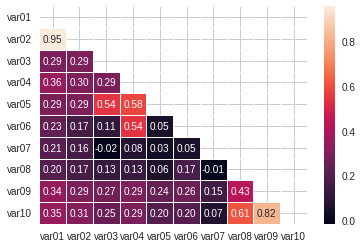

In [ ]:
correlacao = data.corr() #var01 a var10
plot = sn.heatmap(correlacao, annot = True, fmt=".2f", linewidths=.6, mask= np.triu(correlacao))

# 2 - Pré-processamento dos Dados
Pré-processou os dados para verificar a existência de dados faltantes, tipos de dados, realizarem o tratamento e transformar os dados para melhor ajuste aos modelos de aprendizagem de máquina.

In [ ]:
data.isna().sum()

var01     0
var02     0
var03     0
var04     0
var05     0
var06     0
var07     0
var08     0
var09     0
var10     0
var11    48
dtype: int64

In [ ]:
data.describe()

,var01,var02,var03,var04,var05,var06,var07,var08,var09,var10
count,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000
mean,0.064799,0.054776,0.042148,0.024209,0.020997,0.034039,0.393574,0.038798,0.093495,0.076033
std,0.090643,0.089190,0.130107,0.090170,0.095692,0.099645,0.389152,0.103162,0.123674,0.111445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.016810,0.012500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024180,0.013820
50%,0.038220,0.029570,0.000000,0.000000,0.000000,0.000000,0.333330,0.000000,0.055270,0.036870
75%,0.075630,0.062500,0.000000,0.013330,0.000000,0.024390,0.750000,0.027030,0.111980,0.088500
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var01   963 non-null    float64
 1   var02   963 non-null    float64
 2   var03   963 non-null    float64
 3   var04   963 non-null    float64
 4   var05   963 non-null    float64
 5   var06   963 non-null    float64
 6   var07   963 non-null    float64
 7   var08   963 non-null    float64
 8   var09   963 non-null    float64
 9   var10   963 non-null    float64
 10  var11   915 non-null    object 
dtypes: float64(10), object(1)
memory usage: 82.9+ KB


In [ ]:
data.head()

,var01,var02,var03,var04,var05,var06,var07,var08,var09,var10,var11
0,0.10350,0.08503,0.00000,1.00000,1.00000,0.02439,0.0,0.00000,0.21416,0.16129,TARDE
1,0.74045,0.75416,0.70588,0.39259,0.38930,0.03659,1.0,0.52459,1.00000,1.00000,NOITE
2,0.10828,0.08133,0.35294,0.56889,0.57058,0.00000,1.0,0.31148,0.67185,0.23502,TARDE
3,0.45701,0.43623,0.23529,0.95407,0.95691,0.00000,0.0,0.13115,0.20725,0.26728,NOITE
4,0.14650,0.14787,0.82353,0.96593,0.92125,0.39024,0.5,0.01639,0.36269,0.22120,TARDE


# 3- Divisão da Base

Utilizou-se do k-fold, foi dividido a base em Treino e Teste.

In [ ]:
rkf = RepeatedKFold(n_splits=5, n_repeats=10)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, stratify=Y)

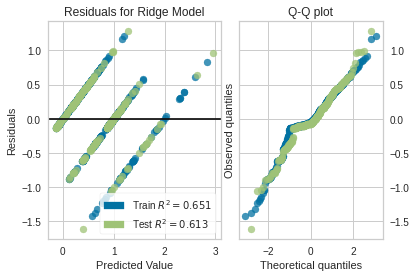

<Axes: title={'center': 'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
model = Ridge()
visualizer = ResidualsPlot(model, hist=False, qqplot=True)
visualizer.fit(xtrain, ytrain)
visualizer.score(xtest, ytest)
visualizer.show()

# 4 - Modelagem
A modelagem foi dividida em duas etapas:



1.   Avaliação prévia do Modelo de AM (KNN, SVM, Árvore de Decisão e/ou Redes Neurais Artificiais, escolher um dentre esses, acho que o melhor seria o de RNA) para verificar a necessidade de implementação de comitês para o dataset proposto.
2. Avaliação do comportamento do Modelo após a aplicação dos comitês bagging, boosting, stacking e voting para o dataset proposto.




##4.1 - Avaliação prévia

###  K-NN ([k-vizinhos mais próximos](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
predictions = []

for k in range(1, 13, 2):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(xtrain, ytrain)

  x_pred = knn.predict(xtrain)
  print("\nk-NN para k = ",k)
  print("TREINO: \nAcurácia = ", metrics.accuracy_score(ytrain, x_pred))
  print(classification_report(ytrain, x_pred))

  y_pred = knn.predict(xtest)
  predictions.append(y_pred)
  print("TESTE \nAcurácia: ", metrics.accuracy_score(ytest, y_pred))
  print(classification_report(ytest, y_pred))



k-NN para k =  1
TREINO: 
Acurácia =  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       279
           1       1.00      1.00      1.00       344
           2       1.00      1.00      1.00        51

    accuracy                           1.00       674
   macro avg       1.00      1.00      1.00       674
weighted avg       1.00      1.00      1.00       674

TESTE 
Acurácia:  0.9377162629757786
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       119
           1       0.94      0.97      0.96       148
           2       1.00      0.59      0.74        22

    accuracy                           0.94       289
   macro avg       0.96      0.84      0.88       289
weighted avg       0.94      0.94      0.93       289


k-NN para k =  3
TREINO: 
Acurácia =  0.9451038575667656
              precision    recall  f1-score   support

           0       0.93      0.94      0.94  

### SVM ([Máquinas de Vetores de Suporte](https://scikit-learn.org/stable/modules/svm.html))





In [ ]:
tuned_parameters = [
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
    {"kernel": ["poly"], "C": [1, 10, 100, 1000]},
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["sigmoid"], "C": [1, 10, 100, 1000]},
]

In [ ]:
clf = GridSearchCV(SVC(), tuned_parameters, cv=rkf)
clf.fit(xtrain, ytrain)
melhor_modelo = clf.best_params_
print("\n\n\n\nTREINO: \n")
means = clf.cv_results_["mean_test_score"]
stds = clf.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
    print("Média: %0.3f Score: (+/-%0.03f) com: %r" % (mean, std * 2, params))


print("\n\n\n\nTESTE - Relatório melhor estimador: ", melhor_modelo)
y_true, y_pred = ytest, clf.predict(xtest)
print(classification_report(y_true, y_pred, target_names=target_names))





TREINO: 

Média: 0.914 Score: (+/-0.045) com: {'C': 1, 'kernel': 'linear'}
Média: 0.913 Score: (+/-0.049) com: {'C': 10, 'kernel': 'linear'}
Média: 0.915 Score: (+/-0.047) com: {'C': 100, 'kernel': 'linear'}
Média: 0.911 Score: (+/-0.054) com: {'C': 1000, 'kernel': 'linear'}
Média: 0.876 Score: (+/-0.045) com: {'C': 1, 'kernel': 'poly'}
Média: 0.890 Score: (+/-0.046) com: {'C': 10, 'kernel': 'poly'}
Média: 0.903 Score: (+/-0.047) com: {'C': 100, 'kernel': 'poly'}
Média: 0.905 Score: (+/-0.053) com: {'C': 1000, 'kernel': 'poly'}
Média: 0.510 Score: (+/-0.078) com: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Média: 0.510 Score: (+/-0.078) com: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
Média: 0.842 Score: (+/-0.056) com: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Média: 0.510 Score: (+/-0.078) com: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
Média: 0.886 Score: (+/-0.059) com: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Média: 0.841 Score: (+/-0.056) com: {'C': 100, 'gamma': 0.0001, 'k

In [ ]:
# Polinomial kernel SVM
svc_pol = SVC(kernel='linear', C=100)


SVM - melhor modelo:  {'C': 100, 'kernel': 'linear'}

TREINO: 
Acurácia =  0.9376854599406528
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       279
           1       0.96      0.92      0.94       344
           2       0.98      0.98      0.98        51

    accuracy                           0.94       674
   macro avg       0.95      0.95      0.95       674
weighted avg       0.94      0.94      0.94       674



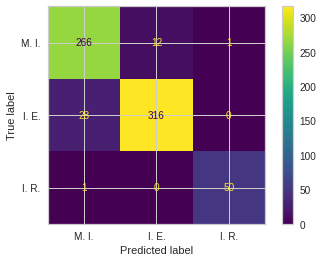

In [ ]:

#TREINO
svc_pol.fit(xtrain, ytrain)

x_pred = svc_pol.predict(xtrain)
print("\nSVM - melhor modelo: ", melhor_modelo)
print("\nTREINO: \nAcurácia = ", metrics.accuracy_score(ytrain, x_pred))
print(classification_report(ytrain, x_pred))


#matriz de confusão - TREINO
ConfusionMatrixDisplay.from_estimator(svc_pol, xtrain, ytrain, display_labels=target_names)
plt.show()




SVM - melhor modelo:  {'C': 100, 'kernel': 'linear'}

TESTE 
Acurácia:  0.916955017301038
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       119
           1       0.97      0.89      0.93       148
           2       0.95      0.86      0.90        22

    accuracy                           0.92       289
   macro avg       0.93      0.91      0.91       289
weighted avg       0.92      0.92      0.92       289



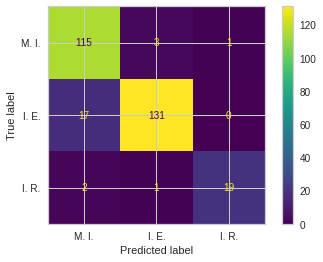

In [ ]:
# TESTE
y_pred = svc_pol.predict(xtest)
predictions.append(y_pred)
print("\nSVM - melhor modelo: ", melhor_modelo)
print("\nTESTE \nAcurácia: ", metrics.accuracy_score(ytest, y_pred))
print(classification_report(ytest, y_pred))


#matriz de confusão - TESTE
ConfusionMatrixDisplay.from_estimator(svc_pol, xtest, ytest, display_labels=target_names)
plt.show()



### DT ([Árvore de Decisão](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))

In [ ]:
decision_tree = DecisionTreeClassifier()

In [ ]:
param_grid = [{'criterion': ["gini","entropy"], 'max_depth': [2, 3, 5, 7, 10], 'min_samples_leaf': [2, 5, 10, 15, 20], 'min_samples_split' : [2,3,4,5,10,15]}]

In [ ]:
scoring = {'Accuracy':'accuracy','F1':'f1_macro','Recall':'recall_macro','Precision':'precision_macro'}
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, n_jobs=-1, cv=rkf, scoring=scoring, error_score=0, refit=False)

In [ ]:
grid_result = grid_search.fit(xtrain, ytrain)

In [ ]:
means_acc = grid_result.cv_results_['mean_test_Accuracy']
means_f1 = grid_result.cv_results_['mean_test_F1']
means_pre = grid_result.cv_results_['mean_test_Precision']
means_rec = grid_result.cv_results_['mean_test_Recall']
params = grid_result.cv_results_['params']

In [ ]:
import csv
f = open('arvore.csv', 'w', newline='', encoding='utf-8')
w = csv.writer(f)
w.writerow(['accuracy', 'f1_macro', 'recall_macro', 'precision_macro', 'sum'])
for acc, f1, rec, pre, param in zip(means_acc, means_f1, means_rec, means_pre, params):
  if acc != 0:
    df2 = pd.DataFrame(params)
    w.writerow([acc, f1, rec, pre, (acc+f1+rec+pre)])

df = pd.read_csv("arvore.csv",  sep=",")
conc = pd.concat([df, df2], axis=1, join='inner')
print(conc)

     accuracy  f1_macro  recall_macro  precision_macro       sum criterion  \
0    0.876705  0.768964      0.744416         0.858059  3.248145      gini   
1    0.876557  0.768637      0.744329         0.856942  3.246466      gini   
2    0.876261  0.767645      0.743887         0.855723  3.243515      gini   
3    0.876854  0.769636      0.745432         0.858157  3.250078      gini   
4    0.876409  0.767972      0.743974         0.856839  3.245194      gini   
..        ...       ...           ...              ...       ...       ...   
252  0.874798  0.792023      0.792025         0.813852  3.272698   entropy   
253  0.874650  0.790529      0.790419         0.811660  3.267259   entropy   
254  0.874797  0.790827      0.790151         0.813179  3.268954   entropy   
255  0.875243  0.792034      0.791844         0.813459  3.272580   entropy   
256  0.875392  0.792671      0.792581         0.814355  3.275000   entropy   

     max_depth  min_samples_leaf  min_samples_split  
0        

In [ ]:
gride_tree = GridSearchCV(decision_tree, param_grid, cv=rkf)

x_hat = gride_tree.fit(xtrain, ytrain)
estimador_tree, escore_tree = gride_tree.best_estimator_, gride_tree.best_score_
print("\n\nMelhor estimador: ",estimador_tree,"\nMelhor score: ", escore_tree)



Melhor estimador:  DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=4) 
Melhor score:  0.9023714759535655


TREINO


 Árvore de decisão - melhor modelo:  DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=4)

TREINO: 
Acurácia =  0.9347181008902077
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       279
           1       0.96      0.92      0.94       344
           2       1.00      0.82      0.90        51

    accuracy                           0.93       674
   macro avg       0.95      0.91      0.93       674
weighted avg       0.94      0.93      0.93       674



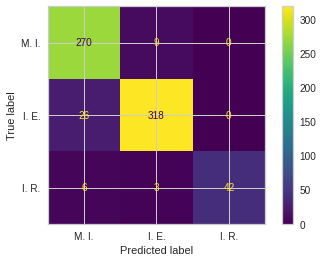

In [ ]:
decision_tree = DecisionTreeClassifier(criterion='gini',max_depth=5, min_samples_leaf=2, min_samples_split=4)

#TREINO
decision_tree.fit(xtrain, ytrain)

x_pred = decision_tree.predict(xtrain)
print("\n Árvore de decisão - melhor modelo: ", estimador_tree)
print("\nTREINO: \nAcurácia = ", metrics.accuracy_score(ytrain, x_pred))
print(classification_report(ytrain, x_pred))

#matriz de confusão - TREINO
ConfusionMatrixDisplay.from_estimator(decision_tree, xtrain, ytrain, display_labels=target_names)
plt.show()

TESTE


 Árvore de decisão - melhor modelo:  DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=4)

TESTE 
Acurácia:  0.8858131487889274
              precision    recall  f1-score   support

           0       0.84      0.96      0.89       119
           1       0.93      0.91      0.92       148
           2       0.89      0.36      0.52        22

    accuracy                           0.89       289
   macro avg       0.89      0.74      0.78       289
weighted avg       0.89      0.89      0.88       289



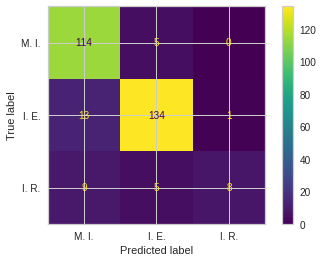

In [ ]:

# TESTE
y_pred = decision_tree.predict(xtest)
predictions.append(y_pred)
print("\n Árvore de decisão - melhor modelo: ", estimador_tree)
print("\nTESTE \nAcurácia: ", metrics.accuracy_score(ytest, y_pred))
print(classification_report(ytest, y_pred))


#matriz de confusão - TESTE
ConfusionMatrixDisplay.from_estimator(decision_tree, xtest, ytest, display_labels=target_names)
plt.show()

### ANN ([Redes Neurais Artificiais](https://scikit-learn.org/stable/modules/neural_networks_supervised.html))

Utilizou-se do `MLPClassifier` (classificador perceptron multicamadas) do `sklearn` como modelo

In [ ]:
param_dict = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'tol': [0.001, 0.01, 0.1],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
}

In [ ]:
net = MLPClassifier(activation='relu', hidden_layer_sizes=(20,),  alpha=0.01, tol=0.001, max_iter=500, solver='sgd')
grid = GridSearchCV(net, param_dict, cv=rkf)


 Rede neural - melhor modelo:  MLPClassifier(activation='identity', alpha=0.1, hidden_layer_sizes=(20,),
              max_iter=500, solver='sgd', tol=0.001)
Acurácia =  0.8367952522255193


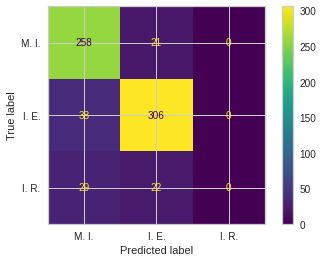

In [ ]:
#TREINO
grid.fit(xtrain, ytrain)

x_pred = grid.predict(xtrain)
estimador_rna, escore_rna = grid.best_estimator_, grid.best_score_
print("\n Rede neural - melhor modelo: ", estimador_rna)
print("Acurácia = ", metrics.accuracy_score(ytrain, x_pred))


#matriz de confusão - TREINO
ConfusionMatrixDisplay.from_estimator(grid, xtrain, ytrain, display_labels=target_names)
plt.show()

In [ ]:
x_melhor = grid.best_estimator_.predict(xtrain)
y_hat = grid.best_estimator_.predict(xtest)
print("\n\nTESTE - \n\nRelatório melhor estimador: ", estimador_rna)
print("Acurácia = ", metrics.accuracy_score(ytest, y_hat))
print(classification_report(ytest, y_hat, target_names=target_names, zero_division=0))



TESTE - 

Relatório melhor estimador:  MLPClassifier(activation='identity', alpha=0.01, hidden_layer_sizes=(20,),
              max_iter=500, solver='sgd', tol=0.001)
Acurácia =  0.8373702422145328
              precision    recall  f1-score   support

       M. I.       0.79      0.93      0.86       119
       I. E.       0.88      0.89      0.88       148
       I. R.       0.00      0.00      0.00        22

    accuracy                           0.84       289
   macro avg       0.56      0.61      0.58       289
weighted avg       0.78      0.84      0.80       289



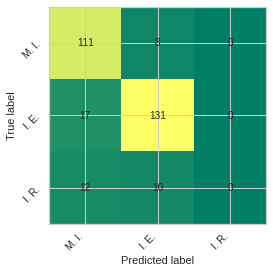

In [ ]:
mat = confusion_matrix(ytest, y_hat)
fig, ax = plt.subplots()
cax = ax.matshow(mat, cmap='summer')
ticks = np.arange(0, len(target_names))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(target_names, rotation=45, ha='right')
ax.set_yticklabels(target_names, rotation=45, ha='right')
ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')
ax.xaxis.set_ticks_position('bottom')

for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        ax.text(j, i, mat[i, j], ha='center', va='center')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
svm = SVC(kernel='linear', C=100)
dt = DecisionTreeClassifier(criterion='gini',max_depth=5, min_samples_leaf=2, min_samples_split=4)
rna = MLPClassifier(activation='identity', alpha=0.01, hidden_layer_sizes=(20,), max_iter=500, solver='sgd', tol=0.001)

In [ ]:
  #matriz de confusão - TESTE
  ConfusionMatrixDisplay.from_estimator(svc_pol, xtest, ytest, display_labels=target_names)
  plt.show()

Accuracy: 0.90 (+/- 0.04) [KNN]
Accuracy: 0.88 (+/- 0.05) [SVM]
Accuracy: 0.87 (+/- 0.06) [DT]
Accuracy: 0.82 (+/- 0.05) [RNA]


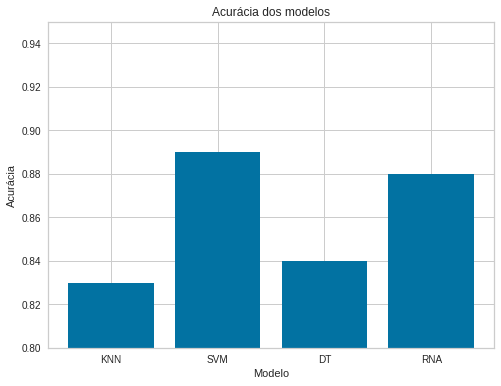

In [ ]:
# Realizar a validação cruzada entre algoritmos individuais
for clf, label in zip([knn, svm, dt, rna], ['KNN', 'SVM', 'DT', 'RNA']):
    scores = cross_val_score(clf, X, Y, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

# Gerar o gráfico de barras com as acurácias dos modelos
plt.figure(figsize=(8, 6))
plt.bar(['KNN', 'SVM', 'DT', 'RNA'], [0.83, 0.89, 0.84, 0.88])
plt.ylim(0.8, 0.95)
plt.title('Acurácia dos modelos')
plt.xlabel('Modelo')
plt.ylabel('Acurácia')
plt.show()

Accuracy: 0.82 (+/- 0.07) [KNN]
Accuracy: 0.86 (+/- 0.07) [SVM]
Accuracy: 0.81 (+/- 0.09) [DT]
Accuracy: 0.57 (+/- 0.04) [RNA]


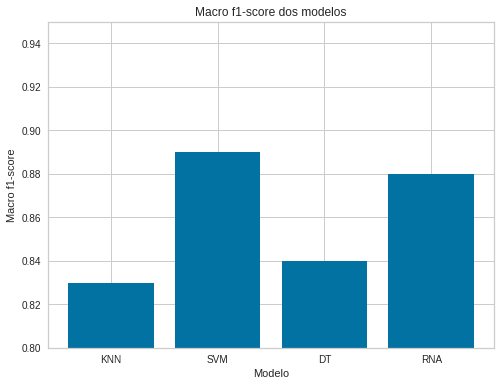

In [ ]:
# Realizar a validação cruzada entre algoritmos individuais
for clf, label in zip([knn, svm, dt, rna], ['KNN', 'SVM', 'DT', 'RNA']):
    scores = cross_val_score(clf, X, Y, cv=10, scoring='f1_macro')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

# Gerar o gráfico de barras com as acurácias dos modelos
plt.figure(figsize=(8, 6))
plt.bar(['KNN', 'SVM', 'DT', 'RNA'], [0.83, 0.89, 0.84, 0.88])
plt.ylim(0.8, 0.95)
plt.title('Macro f1-score dos modelos')
plt.xlabel('Modelo')
plt.ylabel('Macro f1-score')
plt.show()

Accuracy: 0.90 (+/- 0.04) [KNN]
Accuracy: 0.88 (+/- 0.05) [SVM]
Accuracy: 0.87 (+/- 0.06) [DT]
Accuracy: 0.83 (+/- 0.06) [RNA]


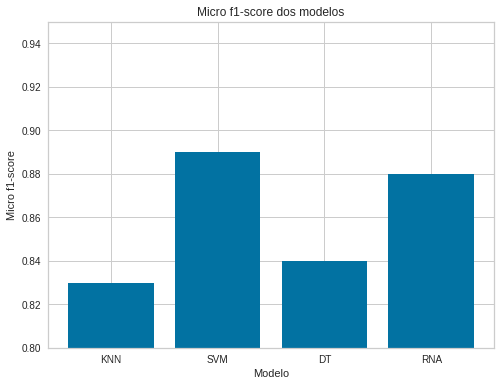

In [ ]:
# Realizar a validação cruzada entre algoritmos individuais
for clf, label in zip([knn, svm, dt, rna], ['KNN', 'SVM', 'DT', 'RNA']):
    scores = cross_val_score(clf, X, Y, cv=10, scoring='f1_micro')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

# Gerar o gráfico de barras com as acurácias dos modelos
plt.figure(figsize=(8, 6))
plt.bar(['KNN', 'SVM', 'DT', 'RNA'], [0.83, 0.89, 0.84, 0.88])
plt.ylim(0.8, 0.95)
plt.title('Micro f1-score dos modelos')
plt.xlabel('Modelo')
plt.ylabel('Micro f1-score')
plt.show()

##4.2 - Avaliação dos comitês nos Modelos de AM

###[Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)

Bagging tem um bom desempenho em geral e fornece a base para todo um campo de algoritmos de árvore de decisão, como os populares algoritmos de floresta aleatória e conjuntos de árvores extras, bem como os menos conhecidos algoritmos de colagem, subespaços aleatórios e patches aleatórios

que muitas vezes considera aprendizes fracos homogêneos, aprende-os independentemente uns dos outros em paralelo e os combina seguindo algum tipo de processo de média determinística


In [ ]:
# obter uma lista de modelos para avaliar
def get_models():
  models = dict()
  models['KNN'] = KNeighborsClassifier(n_neighbors=3)
  models['SVM'] = SVC(kernel='linear', C=100)
  models['DT'] = DecisionTreeClassifier(criterion='gini',max_depth=5, min_samples_leaf=2, min_samples_split=4)
  models['RNA'] = MLPClassifier(activation='identity', alpha=0.01, hidden_layer_sizes=(20,), max_iter=500, solver='sgd', tol=0.001)

  return models

In [ ]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
  bagging = BaggingClassifier(model)
  bagging.fit(xtrain, ytrain)
  y_pred = bagging.predict(xtest)
  score = metrics.accuracy_score(ytest, y_pred)
  print('\n\n>  %s %.4f' % (name, score))
  print (classification_report(ytest, y_pred, target_names=target_names, zero_division=0))





>  KNN 0.9031
              precision    recall  f1-score   support

       M. I.       0.90      0.91      0.90       119
       I. E.       0.90      0.95      0.92       148
       I. R.       1.00      0.55      0.71        22

    accuracy                           0.90       289
   macro avg       0.93      0.80      0.84       289
weighted avg       0.91      0.90      0.90       289



>  SVM 0.8893
              precision    recall  f1-score   support

       M. I.       0.84      0.93      0.88       119
       I. E.       0.93      0.88      0.90       148
       I. R.       0.94      0.73      0.82        22

    accuracy                           0.89       289
   macro avg       0.90      0.85      0.87       289
weighted avg       0.89      0.89      0.89       289



>  DT 0.8962
              precision    recall  f1-score   support

       M. I.       0.86      0.94      0.90       119
       I. E.       0.93      0.89      0.91       148
       I. R.       0.88     

Accuracy: 0.90 (+/- 0.04) [KNN]
Accuracy: 0.88 (+/- 0.05) [SVM]
Accuracy: 0.87 (+/- 0.06) [DT]
Accuracy: 0.83 (+/- 0.07) [RNA]
Accuracy: 0.83 (+/- 0.06) [Ensemble Bagging]


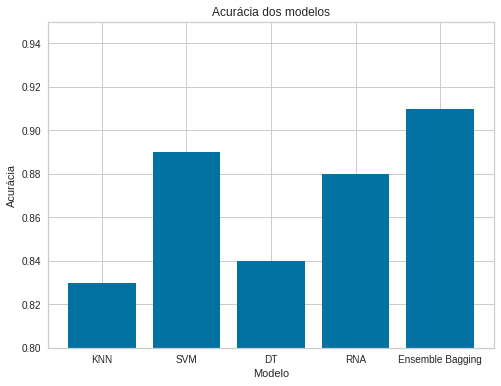

In [ ]:
# Realizar a validação cruzada com o ensemble Bagging e os modelos individuais
for clf, label in zip([knn, svm, dt, rna, bagging], ['KNN', 'SVM', 'DT', 'RNA', 'Ensemble Bagging']):
    scores = cross_val_score(clf, X, Y, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

# Gerar o gráfico de barras com as acurácias dos modelos
plt.figure(figsize=(8, 6))
plt.bar(['KNN', 'SVM', 'DT', 'RNA', 'Ensemble Bagging'], [0.83, 0.89, 0.84, 0.88, 0.91])
plt.ylim(0.8, 0.95)
plt.title('Acurácia dos modelos')
plt.xlabel('Modelo')
plt.ylabel('Acurácia')
plt.show()

###[Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

que muitas vezes considera aprendizes fracos homogêneos, os aprende sequencialmente de forma muito adaptativa (um modelo base depende dos anteriores) e os combina seguindo uma estratégia determinística


In [ ]:
# obter uma lista de modelos para avaliar
def get_models():
  models = dict()
  models['SVM'] = SVC(kernel='linear', C=100)
  models['DT'] = DecisionTreeClassifier(criterion='gini',max_depth=5, min_samples_leaf=2, min_samples_split=4)

  return models

In [ ]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
  boosting = AdaBoostClassifier(model, algorithm='SAMME')
  boosting.fit(xtrain, ytrain)
  y_pred = boosting.predict(xtest)
  score = metrics.accuracy_score(ytest, y_pred)
  print('\n\n>  %s %.4f' % (name, score))
  print (classification_report(ytest, y_pred, target_names=target_names, zero_division=0))



>  SVM 0.9170
              precision    recall  f1-score   support

       M. I.       0.86      0.99      0.92       119
       I. E.       0.97      0.89      0.93       148
       I. R.       1.00      0.73      0.84        22

    accuracy                           0.92       289
   macro avg       0.94      0.87      0.90       289
weighted avg       0.93      0.92      0.92       289



>  DT 0.9516
              precision    recall  f1-score   support

       M. I.       0.94      0.97      0.96       119
       I. E.       0.96      0.97      0.96       148
       I. R.       0.94      0.73      0.82        22

    accuracy                           0.95       289
   macro avg       0.95      0.89      0.91       289
weighted avg       0.95      0.95      0.95       289



In [ ]:
  boosting = AdaBoostClassifier(SVC(kernel='linear', C=100), algorithm='SAMME')
  boosting.fit(xtrain, ytrain)
  y_pred = boosting.predict(xtest)
  score = metrics.accuracy_score(ytest, y_pred)
  print('> SVM %.4f' % (score))
  print (classification_report(ytest, y_pred, target_names=target_names, zero_division=0))

> SVM 0.9170
              precision    recall  f1-score   support

       M. I.       0.86      0.99      0.92       119
       I. E.       0.97      0.89      0.93       148
       I. R.       1.00      0.73      0.84        22

    accuracy                           0.92       289
   macro avg       0.94      0.87      0.90       289
weighted avg       0.93      0.92      0.92       289



In [ ]:
  boosting = AdaBoostClassifier(DecisionTreeClassifier(criterion='gini',max_depth=5, min_samples_leaf=2, min_samples_split=4))
  boosting.fit(xtrain, ytrain)
  y_pred = boosting.predict(xtest)
  score = metrics.accuracy_score(ytest, y_pred)
  print('> DT %.4f' % (score))
  print (classification_report(ytest, y_pred, target_names=target_names, zero_division=0))

> DT 0.9377
              precision    recall  f1-score   support

       M. I.       0.93      0.96      0.94       119
       I. E.       0.95      0.95      0.95       148
       I. R.       0.94      0.73      0.82        22

    accuracy                           0.94       289
   macro avg       0.94      0.88      0.90       289
weighted avg       0.94      0.94      0.94       289



Accuracy: 0.88 (+/- 0.05) [SVM]
Accuracy: 0.86 (+/- 0.05) [DT]
Accuracy: 0.92 (+/- 0.05) [Ensemble Boosting]


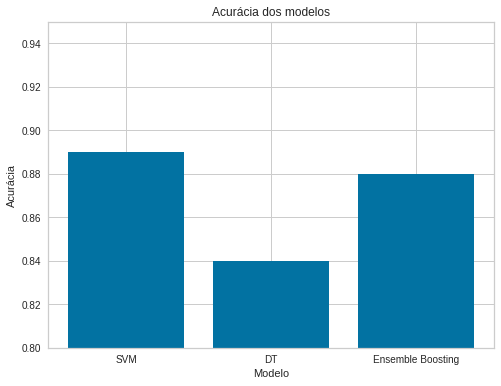

In [ ]:
# Realizar a validação cruzada com o ensemble Boosting e os modelos individuais
for clf, label in zip([svm, dt, boosting], ['SVM', 'DT', 'Ensemble Boosting']):
    scores = cross_val_score(clf, X, Y, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

# Gerar o gráfico de barras com as acurácias dos modelos
plt.figure(figsize=(8, 6))
plt.bar(['SVM', 'DT', 'Ensemble Boosting'], [0.89, 0.84, 0.88])
plt.ylim(0.8, 0.95)
plt.title('Acurácia dos modelos')
plt.xlabel('Modelo')
plt.ylabel('Acurácia')
plt.show()

###[Stacking](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html)

que geralmente considera aprendizes fracos heterogêneos, aprende-os em paralelo e os combina treinando um meta-modelo para produzir uma previsão com base nas diferentes previsões de modelos fracos

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
svm = SVC(kernel='linear', C=100)
dt = DecisionTreeClassifier(criterion='gini',max_depth=5, min_samples_leaf=2, min_samples_split=4)
rna = MLPClassifier(activation='identity', alpha=0.01, hidden_layer_sizes=(20,), max_iter=500, solver='sgd', tol=0.001)


In [ ]:
estimators = [
            ('knn',knn),
            ('svm',svm),
            ('dt',dt),
            ('rna',rna),
            ]

In [ ]:
# Definindo o modelo ensemble com a estratégia de Stacking
ensemble_stacking = StackingClassifier(estimators=estimators, cv=5)

In [ ]:
# Treinando o modelo ensemble
ensemble_stacking.fit(xtrain,ytrain)

StackingClassifier(cv=5,
                   estimators=[('knn', KNeighborsClassifier(n_neighbors=3)),
                               ('svm', SVC(C=100, kernel='linear')),
                               ('dt',
                                DecisionTreeClassifier(max_depth=5,
                                                       min_samples_leaf=2,
                                                       min_samples_split=4)),
                               ('rna',
                                MLPClassifier(activation='identity',
                                              hidden_layer_sizes=(20,),
                                              max_iter=500, solver='sgd',
                                              tol=0.001))])

In [ ]:
# Fazendo as previsões no conjunto de testes
y_pred = ensemble_stacking.predict(xtest)
print("> Stacking metrícas: ", metrics.accuracy_score(ytest, y_pred))
print(classification_report(ytest, y_pred, target_names=target_names, zero_division=0))

> Stacking metrícas:  0.9273356401384083
              precision    recall  f1-score   support

       M. I.       0.93      0.93      0.93       119
       I. E.       0.93      0.95      0.94       148
       I. R.       0.89      0.73      0.80        22

    accuracy                           0.93       289
   macro avg       0.92      0.87      0.89       289
weighted avg       0.93      0.93      0.93       289



In [ ]:
stacking_knn = StackingClassifier(estimators=estimators, final_estimator=knn, cv=5)
stacking_svm = StackingClassifier(estimators=estimators, final_estimator=svm, cv=5)
stacking_dt = StackingClassifier(estimators=estimators, final_estimator=dt, cv=5)
stacking_rna = StackingClassifier(estimators=estimators, final_estimator=rna, cv=5)

In [ ]:
#knn
stacking_knn.fit(xtrain,ytrain)
y_pred = stacking_knn.predict(xtest)
print("> KNN ", metrics.accuracy_score(ytest, y_pred))
print(classification_report(ytest, y_pred, target_names=target_names, zero_division=0))

> KNN  0.9204152249134948
              precision    recall  f1-score   support

       M. I.       0.92      0.92      0.92       119
       I. E.       0.93      0.95      0.94       148
       I. R.       0.89      0.73      0.80        22

    accuracy                           0.92       289
   macro avg       0.91      0.87      0.89       289
weighted avg       0.92      0.92      0.92       289



In [ ]:
#svm
stacking_svm.fit(xtrain,ytrain)
y_pred = stacking_svm.predict(xtest)
print("> SVM ", metrics.accuracy_score(ytest, y_pred))
print(classification_report(ytest, y_pred, target_names=target_names, zero_division=0))

> SVM  0.9342560553633218
              precision    recall  f1-score   support

       M. I.       0.91      0.96      0.93       119
       I. E.       0.96      0.94      0.95       148
       I. R.       0.89      0.77      0.83        22

    accuracy                           0.93       289
   macro avg       0.92      0.89      0.90       289
weighted avg       0.93      0.93      0.93       289



In [ ]:
#Árvore de decisão
stacking_dt.fit(xtrain,ytrain)
y_pred = stacking_dt.predict(xtest)
print("> DT ", metrics.accuracy_score(ytest, y_pred))
print(classification_report(ytest, y_pred, target_names=target_names, zero_division=0))

> DT  0.8961937716262975
              precision    recall  f1-score   support

       M. I.       0.85      0.95      0.90       119
       I. E.       0.94      0.88      0.91       148
       I. R.       0.89      0.73      0.80        22

    accuracy                           0.90       289
   macro avg       0.89      0.85      0.87       289
weighted avg       0.90      0.90      0.90       289



In [ ]:
#Redes neurais
stacking_rna.fit(xtrain,ytrain)
y_pred = stacking_rna.predict(xtest)
print("> RNA ", metrics.accuracy_score(ytest, y_pred))
print (classification_report(ytest, y_pred, target_names=target_names, zero_division=0))

> RNA  0.8927335640138409
              precision    recall  f1-score   support

       M. I.       0.85      0.94      0.90       119
       I. E.       0.92      0.89      0.90       148
       I. R.       0.94      0.68      0.79        22

    accuracy                           0.89       289
   macro avg       0.90      0.84      0.86       289
weighted avg       0.90      0.89      0.89       289



In [ ]:
# Realizar a validação cruzada com o ensemble Stacking e os modelos individuais
for clf, label in zip([knn, svm, dt, rna, ensemble_stacking], ['KNN', 'SVM', 'DT', 'RNA', 'Ensemble Stacking']):
    scores = cross_val_score(clf, X, Y, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

# Gerar o gráfico de barras com as acurácias dos modelos
plt.figure(figsize=(8, 6))
plt.bar(['KNN', 'SVM', 'DT', 'RNA', 'Ensemble Stacking'], [0.83, 0.89, 0.84, 0.88, 0.91])
plt.ylim(0.8, 0.95)
plt.title('Acurácia dos modelos')
plt.xlabel('Modelo')
plt.ylabel('Acurácia')
plt.show()

###[Voting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)

Na estratégia de Voting, cada modelo é treinado independentemente e, em seguida, suas previsões são combinadas por meio de uma votação. Existem duas formas de votação: a votação dura (hard voting) e a votação suave (soft voting). Na votação dura, a classe prevista pela maioria dos modelos é selecionada como a previsão final, enquanto na votação suave, é feita uma média das probabilidades previstas por cada modelo e a classe com a maior probabilidade é selecionada como a previsão final.


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
svm = SVC(kernel='linear', C=100)
dt = DecisionTreeClassifier(criterion='gini',max_depth=5, min_samples_leaf=2, min_samples_split=4)
rna = MLPClassifier(activation='identity', alpha=0.01, hidden_layer_sizes=(20,), max_iter=500, solver='sgd', tol=0.001)

In [ ]:
estimators = [
            ('knn',knn),
            ('svm',svm),
            ('dt',dt),
            ('rna',rna),
            ]

In [ ]:
# Definindo o modelo ensemble com a estratégia de Voting
ensemble_voting = VotingClassifier(estimators=estimators, voting='hard')


In [ ]:
# Treinando o modelo ensemble
ensemble_voting.fit(xtrain,ytrain)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=3)),
                             ('svm', SVC(C=100, kernel='linear')),
                             ('dt',
                              DecisionTreeClassifier(max_depth=5,
                                                     min_samples_leaf=2,
                                                     min_samples_split=4)),
                             ('rna',
                              MLPClassifier(activation='identity',
                                            hidden_layer_sizes=(20,),
                                            max_iter=500, solver='sgd',
                                            tol=0.001))])

In [ ]:
# Fazendo as previsões no conjunto de testes
y_pred = ensemble_voting.predict(xtest)
print("> Voting metrícas: ", metrics.accuracy_score(ytest, y_pred))
print(classification_report(ytest, y_pred, target_names=target_names, zero_division=0))

> Voting metrícas:  0.8823529411764706
              precision    recall  f1-score   support

       M. I.       0.82      0.97      0.89       119
       I. E.       0.94      0.88      0.91       148
       I. R.       1.00      0.45      0.62        22

    accuracy                           0.88       289
   macro avg       0.92      0.77      0.81       289
weighted avg       0.89      0.88      0.88       289



In [ ]:
# Avaliando a performance do modelo ensemble
accuracy = ensemble_voting.score(xtest, ytest)
print('Acurácia: {:.2f}%'.format(accuracy*100))

Acurácia: 88.24%


In [ ]:
voiting_knn = VotingClassifier(estimators=estimators, voting='hard')
voiting_svm = VotingClassifier(estimators=estimators, voting='hard')
voiting_dt = VotingClassifier(estimators=estimators, voting='hard')
voiting_rna = VotingClassifier(estimators=estimators, voting='hard')

In [ ]:
#knn
voiting_knn.fit(xtrain,ytrain)
y_pred = voiting_knn.predict(xtest)
print("> KNN ", metrics.accuracy_score(ytest, y_pred))
print(classification_report(ytest, y_pred, target_names=target_names, zero_division=0))

> KNN  0.889273356401384
              precision    recall  f1-score   support

       M. I.       0.83      0.97      0.89       119
       I. E.       0.94      0.88      0.91       148
       I. R.       1.00      0.55      0.71        22

    accuracy                           0.89       289
   macro avg       0.92      0.80      0.84       289
weighted avg       0.90      0.89      0.89       289



In [ ]:
#svm
voiting_svm.fit(xtrain,ytrain)
y_pred = voiting_svm.predict(xtest)
print("> SVM ", metrics.accuracy_score(ytest, y_pred))
print(classification_report(ytest, y_pred, target_names=target_names, zero_division=0))

> SVM  0.8858131487889274
              precision    recall  f1-score   support

       M. I.       0.83      0.97      0.89       119
       I. E.       0.94      0.88      0.91       148
       I. R.       1.00      0.50      0.67        22

    accuracy                           0.89       289
   macro avg       0.92      0.78      0.82       289
weighted avg       0.90      0.89      0.88       289



In [ ]:
#Árvore de decisão
voiting_dt.fit(xtrain,ytrain)
y_pred = voiting_dt.predict(xtest)
print("> DT ", metrics.accuracy_score(ytest, y_pred))
print(classification_report(ytest, y_pred, target_names=target_names, zero_division=0))

> DT  0.8823529411764706
              precision    recall  f1-score   support

       M. I.       0.82      0.97      0.89       119
       I. E.       0.94      0.88      0.91       148
       I. R.       1.00      0.45      0.62        22

    accuracy                           0.88       289
   macro avg       0.92      0.77      0.81       289
weighted avg       0.89      0.88      0.88       289



In [ ]:
#Redes neurais
voiting_rna.fit(xtrain,ytrain)
y_pred = voiting_rna.predict(xtest)
print("> RNA ", metrics.accuracy_score(ytest, y_pred))
print (classification_report(ytest, y_pred, target_names=target_names, zero_division=0))

> RNA  0.889273356401384
              precision    recall  f1-score   support

       M. I.       0.83      0.97      0.89       119
       I. E.       0.94      0.88      0.91       148
       I. R.       1.00      0.55      0.71        22

    accuracy                           0.89       289
   macro avg       0.92      0.80      0.84       289
weighted avg       0.90      0.89      0.89       289



In [ ]:
 [
            ('knn',knn),
            ('svm',svm),
            ('dt',dt),
            ('rna',rna),
            ]

[('knn', KNeighborsClassifier(n_neighbors=3)),
 ('svm', SVC(C=100, kernel='linear')),
 ('dt',
  DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=4)),
 ('rna',
  MLPClassifier(activation='identity', hidden_layer_sizes=(20,), max_iter=500,
                solver='sgd', tol=0.001))]

Accuracy: 0.90 (+/- 0.04) [KNN]
Accuracy: 0.88 (+/- 0.05) [SVM]
Accuracy: 0.86 (+/- 0.05) [DT]
Accuracy: 0.83 (+/- 0.07) [RNA]
Accuracy: 0.88 (+/- 0.07) [Ensemble Voting]


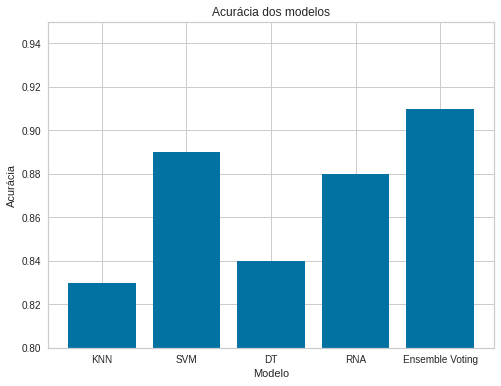

In [ ]:
# Realizar a validação cruzada com o ensemble Voting e os modelos individuais
for clf, label in zip([knn, svm, dt, rna, ensemble_voting], ['KNN', 'SVM', 'DT', 'RNA', 'Ensemble Voting']):
    scores = cross_val_score(clf, X, Y, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

# Gerar o gráfico de barras com as acurácias dos modelos
plt.figure(figsize=(8, 6))
plt.bar(['KNN', 'SVM', 'DT', 'RNA', 'Ensemble Voting'], [0.83, 0.89, 0.84, 0.88, 0.91])
plt.ylim(0.8, 0.95)
plt.title('Acurácia dos modelos')
plt.xlabel('Modelo')
plt.ylabel('Acurácia')
plt.show()